In [1]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from PIL import ImageFile
from tensorflow.keras.utils import plot_model
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [2]:
testing_path = 'D:\\Research Dataset\\Shrimp Recognition\\validating\\' 
training_path = 'D:\\Research Dataset\\Shrimp Recognition\\training\\'
from keras.preprocessing.image import ImageDataGenerator
train_datagen =  ImageDataGenerator(
    rescale = 1./255,
)
test_datagen = ImageDataGenerator(
    rescale = 1./255
    )

train_dataset = train_datagen.flow_from_directory(training_path,target_size = (224,224),batch_size = 16,)
test_dataset = test_datagen.flow_from_directory(testing_path,target_size = (224,224),batch_size = 16,)

""".fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.
.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.
"""


Found 38042 images belonging to 4 classes.
Found 4681 images belonging to 4 classes.


'.fit is used when the entire training dataset can fit into the memory and no data augmentation is applied.\n.fit_generator is used when either we have a huge dataset to fit into our memory or when data augmentation needs to be applied.\n'

In [3]:


# Load pre-trained ResNet50 without top layers
base_model = ResNet50(weights='imagenet', 
                    include_top=False, 
                    input_shape=(224, 224, 3))

# Freeze base model layers (optional - you can unfreeze for fine-tuning)
base_model.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(4, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)
model.summary() 


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

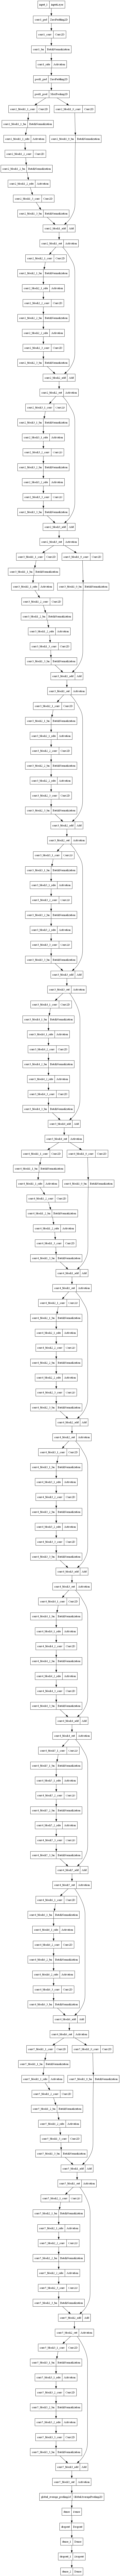

In [4]:
# import os
# os.environ["PATH"] += os.pathsep + r'C:\Program Files\Graphviz\bin'
plot_model(model,to_file='model_3.png')

In [5]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("Resnet_model.h5", monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=False, mode='max', period=1)
early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=15, verbose=1, mode='max')

In [7]:
history = model.fit(
    train_dataset,
    validation_data = test_dataset,
    epochs = 50,
    steps_per_epoch = len(train_dataset),
    validation_steps = len(test_dataset),
    verbose=1,
    callbacks=[checkpoint,early],
    shuffle=True,
    workers = 5
)

Epoch 1/50
2378/2378 [==============================] - ETA: 0s - loss: 0.9924 - accuracy: 0.5647
Epoch 1: val_accuracy improved from -inf to 0.71865, saving model to Resnet_model.h5
2378/2378 [==============================] - 145s 58ms/step - loss: 0.9924 - accuracy: 0.5647 - val_loss: 0.7153 - val_accuracy: 0.7186
Epoch 2/50
2378/2378 [==============================] - ETA: 0s - loss: 0.7986 - accuracy: 0.6699
Epoch 2: val_accuracy improved from 0.71865 to 0.75924, saving model to Resnet_model.h5
2378/2378 [==============================] - 132s 55ms/step - loss: 0.7986 - accuracy: 0.6699 - val_loss: 0.6389 - val_accuracy: 0.7592
Epoch 3/50
2378/2378 [==============================] - ETA: 0s - loss: 0.6887 - accuracy: 0.7206
Epoch 3: val_accuracy improved from 0.75924 to 0.76266, saving model to Resnet_model.h5
2378/2378 [==============================] - 132s 56ms/step - loss: 0.6887 - accuracy: 0.7206 - val_loss: 0.5718 - val_accuracy: 0.7627
Epoch 4/50
2378/2378 [===============

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


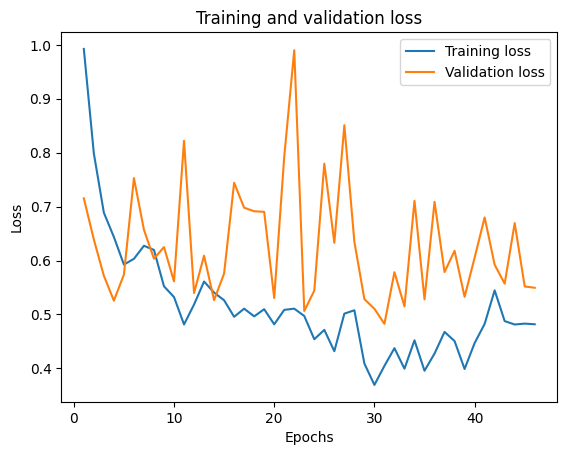

In [8]:
from matplotlib import pyplot as plt
history_dict = history.history
print(history_dict.keys())
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc = history_dict['accuracy']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, loss_values, label="Training loss")
plt.plot(epochs, val_loss_values, label='Validation loss')
plt.title("Training and validation loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
# plt.savefig("Model_2_trainingVsvalidationLoss.jpeg")
plt.show()


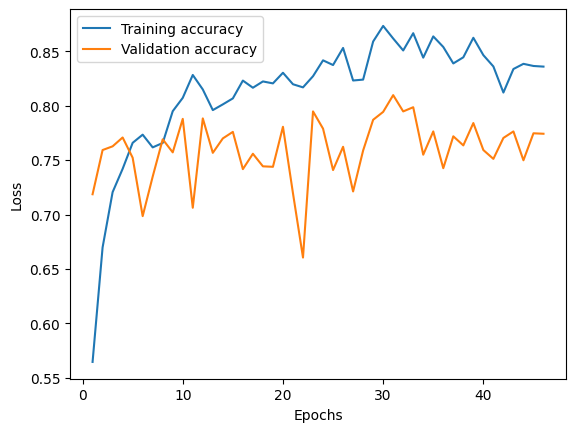

In [9]:
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.xlabel("Epochs")
plt.ylabel('Loss')
plt.legend()
# plt.savefig("Model_1_trainingVsvalidationAccuracy.jpeg")
plt.show()

In [10]:
import pandas as pd 
his_df = pd.DataFrame(history_dict)

In [11]:
his_df.to_excel('ResNet_history.xlsx',index=False)